# AI Hiring Bias Analysis (Baseline)

## Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("cleaned_fair_recrutment_dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119971 entries, 0 to 119970
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Candidate_ID          119971 non-null  int64  
 1   Gender                119971 non-null  object 
 2   Age                   119971 non-null  int64  
 3   Education_Level       119971 non-null  object 
 4   Experience_Years      119971 non-null  int64  
 5   Skill_Score           119971 non-null  int64  
 6   Aptitude_Test_Score   119971 non-null  int64  
 7   Technical_Test_Score  119971 non-null  int64  
 8   Communication_Score   119971 non-null  int64  
 9   Certifications_Count  119971 non-null  float64
 10  Previous_Companies    119971 non-null  int64  
 11  Interview_Score       119971 non-null  int64  
 12  Location              119971 non-null  object 
 13  Job_Role_Applied      119971 non-null  object 
 14  Expected_Salary       119971 non-null  int64  
 15  

## Modeling (Baseline)

In [3]:
# data processing - convert categorical to numeric

# Age_Group: Ordinal encoding
df["Age_Group"] = df["Age_Group"].map({
    "18-25": 0, 
    "26-35": 1, 
    "36-45": 2, 
    "46-55": 3, 
    "55+": 4
})

# Gender: Male=0, Female=1, Other=2
df["Gender"] = df["Gender"].map({"Male": 0, "Female": 1, "Other": 2})

# Education_Level: Ordinal encoding (higher education = higher value)
df["Education_Level"] = df["Education_Level"].map({
    "High School": 0, 
    "Diploma": 1, 
    "Bachelors": 2, 
    "Masters": 3, 
    "PhD": 4
})

# Location: Rural=0, Semi-Urban=1, Urban=2
df["Location"] = df["Location"].map({"Rural": 0, "Semi-Urban": 1, "Urban": 2})

# Job_Role_Applied: Label encoding
df["Job_Role_Applied"] = df["Job_Role_Applied"].map({
    "Data Analyst": 0, 
    "HR Executive": 1, 
    "Manager": 2, 
    "ML Engineer": 3, 
    "Software Engineer": 4
})

df

,Candidate_ID,Gender,Age,Education_Level,Experience_Years,Skill_Score,Aptitude_Test_Score,Technical_Test_Score,Communication_Score,Certifications_Count,Previous_Companies,Interview_Score,Location,Job_Role_Applied,Expected_Salary,Hiring_Decision,Age_Group
0,1,0,50,2,19,48,75,70,65,2.0,5,92,2,1,22214,1,3
1,2,2,36,2,18,9,53,46,25,2.0,4,77,1,0,130094,0,2
2,3,1,58,3,11,1,85,62,72,1.0,3,90,2,3,78652,0,4
3,4,0,48,3,0,74,35,79,67,6.0,3,9,2,1,144618,0,3
4,5,0,37,2,0,64,99,25,38,7.0,5,24,2,0,133865,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119966,119996,0,51,2,12,36,68,55,98,2.0,6,82,2,4,115884,1,3
119967,119997,0,54,3,11,35,79,0,60,2.0,7,99,2,4,121326,0,3
119968,119998,0,30,2,8,18,56,60,22,6.0,0,1,0,2,63072,0,1
119969,119999,0,30,2,6,67,99,4,46,0.0,3,66,0,2,108627,1,1


In [ ]:
# Read data x and y
x = df.drop(["Hiring_Decision", "Candidate_ID"], axis=1)
y = df["Hiring_Decision"]

# split dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# train model
model = DecisionTreeClassifier(random_state=1)
model.fit(x_train, y_train)

# get accuracy
y_pred = model.predict(x_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.96


## Evaluation

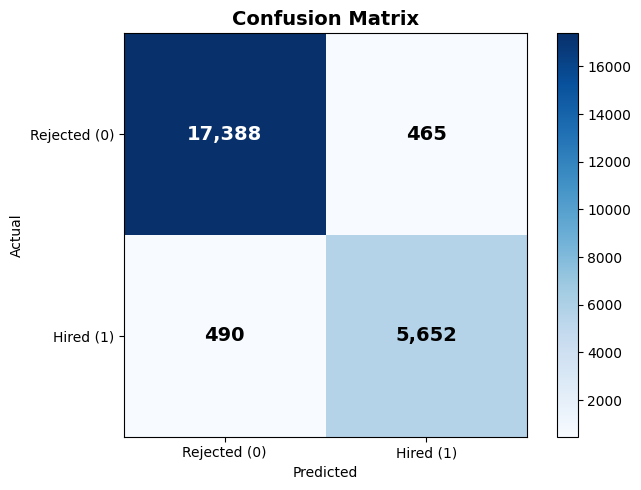

In [5]:
# confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7, 5))
plt.imshow(conf_matrix, cmap="Blues")
plt.colorbar()
plt.title("Confusion Matrix", fontsize=14, fontweight="bold")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks([0, 1], ["Rejected (0)", "Hired (1)"])
plt.yticks([0, 1], ["Rejected (0)", "Hired (1)"])

# Add values in cells
for i in range(2):
    for j in range(2):
        color = "white" if conf_matrix[i, j] > conf_matrix.max()/2 else "black"
        plt.text(j, i, f"{conf_matrix[i, j]:,}", ha="center", va="center", 
                 color=color, fontsize=14, fontweight="bold")

plt.tight_layout()
plt.show()

Now examine gender: Male, Female, and Other

Male Accuracy: 0.96 (n=14,431)
Female Accuracy: 0.96 (n=8,368)
Other Accuracy: 0.96 (n=1,196)


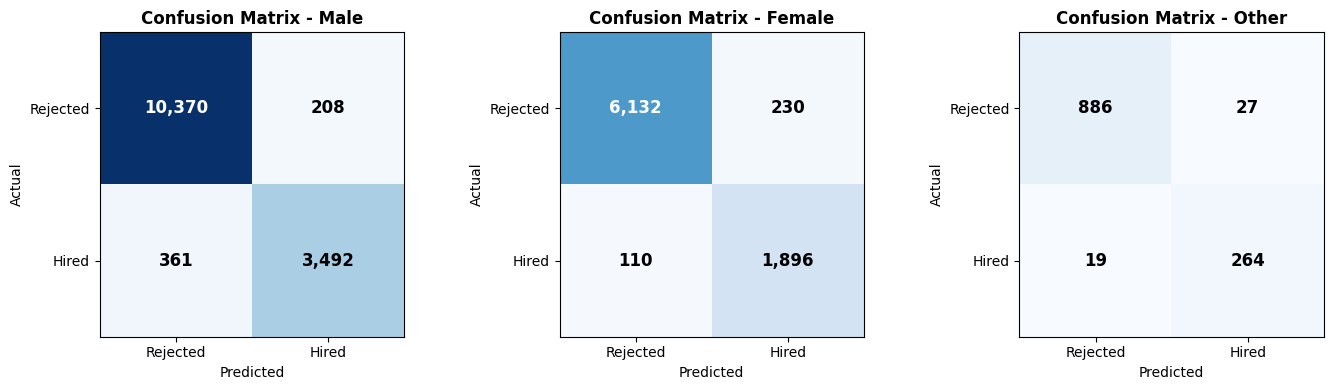

In [6]:
# Confusion Matrix by Gender (Male, Female, Other)
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

gender_labels = {0: "Male", 1: "Female", 2: "Other"}

# Find global max for consistent color scale
all_cms = []
for gender_code in gender_labels.keys():
    mask = x_test["Gender"] == gender_code
    cm = metrics.confusion_matrix(y_test[mask], y_pred[mask])
    all_cms.append(cm)
vmax = max(cm.max() for cm in all_cms)

for idx, (gender_code, gender_name) in enumerate(gender_labels.items()):
    # Filter by gender
    mask = x_test["Gender"] == gender_code
    y_test_gender = y_test[mask]
    y_pred_gender = y_pred[mask]
    
    # Compute confusion matrix for this gender
    cm = metrics.confusion_matrix(y_test_gender, y_pred_gender)
    
    # Plot with same color scale
    im = axes[idx].imshow(cm, cmap="Blues", vmin=0, vmax=vmax)
    axes[idx].set_title(f"Confusion Matrix - {gender_name}", fontsize=12, fontweight="bold")
    axes[idx].set_xlabel("Predicted")
    axes[idx].set_ylabel("Actual")
    axes[idx].set_xticks([0, 1])
    axes[idx].set_yticks([0, 1])
    axes[idx].set_xticklabels(["Rejected", "Hired"])
    axes[idx].set_yticklabels(["Rejected", "Hired"])
    
    # Add values
    for i in range(2):
        for j in range(2):
            color = "white" if cm[i, j] > vmax/2 else "black"
            axes[idx].text(j, i, f"{cm[i, j]:,}", ha="center", va="center", 
                          color=color, fontsize=12, fontweight="bold")
    
    # Print accuracy for this gender
    acc = metrics.accuracy_score(y_test_gender, y_pred_gender)
    print(f"{gender_name} Accuracy: {acc:.2f} (n={len(y_test_gender):,})")

plt.tight_layout()
plt.show()


In [7]:
# Fairness Metrics by Gender
def compute_fairness_metrics(y_true, y_pred):
    """Compute fairness metrics from actual and predicted values"""
    tn, fp, fn, tp = metrics.confusion_matrix(y_true, y_pred).ravel()
    
    tpr = tp / (tp + fn) if (tp + fn) > 0 else 0  # True Positive Rate (Recall)
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0  # False Positive Rate
    fnr = fn / (fn + tp) if (fn + tp) > 0 else 0  # False Negative Rate
    tnr = tn / (tn + fp) if (tn + fp) > 0 else 0  # True Negative Rate (Specificity)
    ppv = tp / (tp + fp) if (tp + fp) > 0 else 0  # Positive Predictive Value (Precision)
    npv = tn / (tn + fn) if (tn + fn) > 0 else 0  # Negative Predictive Value
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    selection_rate = (tp + fp) / (tp + tn + fp + fn)
    
    return {
        "TPR (Recall)": tpr,
        "FPR": fpr,
        "FNR": fnr,
        "TNR (Specificity)": tnr,
        "PPV (Precision)": ppv,
        "NPV": npv,
        "Accuracy": accuracy,
        "Selection Rate": selection_rate
    }

# Compute metrics for each gender (including Other)
gender_labels = {0: "Male", 1: "Female", 2: "Other"}
fairness_results = {}

for gender_code, gender_name in gender_labels.items():
    mask = x_test["Gender"] == gender_code
    fairness_results[gender_name] = compute_fairness_metrics(y_test[mask], y_pred[mask])

# Create comparison table
fairness_df = pd.DataFrame(fairness_results).T
fairness_df = fairness_df.round(4)
print("="*60)
print("FAIRNESS METRICS BY GENDER")
print("="*60)
print(fairness_df.to_string())

# Compute disparities (max difference across all groups)
print("\n" + "="*60)
print("DISPARITY ANALYSIS (Max difference across groups)")
print("="*60)
disparity = {}
for metric in fairness_df.columns:
    values = [fairness_results[g][metric] for g in gender_labels.values()]
    diff = max(values) - min(values)
    disparity[metric] = diff
    
for metric, diff in disparity.items():
    status = "✓ Fair" if diff < 0.05 else "⚠ Unfair" if diff < 0.1 else "✗ Biased"
    print(f"{metric:20s}: {diff:.4f}  {status}")

# Fairness criteria evaluation
print("\n" + "="*60)
print("FAIRNESS CRITERIA EVALUATION")
print("="*60)
tpr_diff = disparity["TPR (Recall)"]
fpr_diff = disparity["FPR"]
ppv_diff = disparity["PPV (Precision)"]
sr_diff = disparity["Selection Rate"]

print(f"Equal Opportunity (TPR parity):      {'✓ PASS' if tpr_diff < 0.05 else '✗ FAIL'} (diff={tpr_diff:.4f})")
print(f"Equalized Odds (TPR + FPR parity):   {'✓ PASS' if tpr_diff < 0.05 and fpr_diff < 0.05 else '✗ FAIL'} (TPR={tpr_diff:.4f}, FPR={fpr_diff:.4f})")
print(f"Predictive Parity (PPV parity):      {'✓ PASS' if ppv_diff < 0.05 else '✗ FAIL'} (diff={ppv_diff:.4f})")
print(f"Demographic Parity (Selection Rate): {'✓ PASS' if sr_diff < 0.05 else '✗ FAIL'} (diff={sr_diff:.4f})")


FAIRNESS METRICS BY GENDER
        TPR (Recall)     FPR     FNR  TNR (Specificity)  PPV (Precision)     NPV  Accuracy  Selection Rate
Male          0.9063  0.0197  0.0937             0.9803           0.9438  0.9664    0.9606          0.2564
Female        0.9452  0.0362  0.0548             0.9638           0.8918  0.9824    0.9594          0.2541
Other         0.9329  0.0296  0.0671             0.9704           0.9072  0.9790    0.9615          0.2433

DISPARITY ANALYSIS (Max difference across groups)
TPR (Recall)        : 0.0389  ✓ Fair
FPR                 : 0.0165  ✓ Fair
FNR                 : 0.0389  ✓ Fair
TNR (Specificity)   : 0.0165  ✓ Fair
PPV (Precision)     : 0.0520  ⚠ Unfair
NPV                 : 0.0160  ✓ Fair
Accuracy            : 0.0022  ✓ Fair
Selection Rate      : 0.0131  ✓ Fair

FAIRNESS CRITERIA EVALUATION
Equal Opportunity (TPR parity):      ✓ PASS (diff=0.0389)
Equalized Odds (TPR + FPR parity):   ✓ PASS (TPR=0.0389, FPR=0.0165)
Predictive Parity (PPV parity):      ✗ 

**Conclusion**

Since the dataset appears to be artificially generated and structurally balanced, the baseline decision tree model has shown minimal differences among sensitive groups. Fairness assessments indicate small differences in equal opportunity (equal TPR) and equal probability (equal TPR and FPR), and nearly identical demographic equality (selection rates) between male, female and other candidates. Overall accuracy remains high (96%), and consistent performance metrics at the group level suggest no significant evidence of systematic bias in the unconstrained model.

While the baseline model performs well under various fairness criteria, we will next apply a simplified fairness approach to explicitly enforce fairness constraints. This allows us to examine whether constraint optimization can significantly improve group equilibrium and analyze the potential trade-offs between predictive performance and fairness.